# jakie jest prawdopodobieństwo, że pierwszego dnia miesiąca doszło do przestępstawa z bronią palną?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp 
import scipy.stats as st

In [2]:
clean_data=pd.read_csv('clean_data.csv')

In [3]:
clean_data.head()

,Unnamed: 0,iyear,imonth,iday,country_txt,region_txt,city,attacktype1,attacktype1_txt,targtype1,targtype1_txt,nkill,natlty1_txt,weapon
0,0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,1,Assassination,14,Private Citizens & Property,1.0,Dominican Republic,Firearms
1,2,1970,1,0,Philippines,Southeast Asia,Unknown,1,Assassination,10,Journalists & Media,1.0,United States,Firearms
2,5,1970,1,1,United States,North America,Cairo,2,Armed Assault,3,Police,0.0,United States,Firearms
3,6,1970,1,2,Uruguay,South America,Montevideo,1,Assassination,3,Police,0.0,Uruguay,Firearms
4,7,1970,1,2,United States,North America,Oakland,3,Bombing/Explosion,21,Utilities,0.0,United States,Explosives


In [7]:
class Propability:

#wybranie tylko używanych kolumn
    def dataset(self):
        df_pred=clean_data('iyear','region_txt','targtype1_txt','weapon')
        return df_pred
 
 # definicja po czym bedzie grupowanie (lista)
    def grouper(self,dataset,group_by):
        mask=((dataset.group_by==group_by.value())&(dataset.group_by==group_by.value()))
            if mask[0]!='nan' and mask[1]!='nan':
                mask=((dataset.group_by==group_by.value())&(dataset.group_by==group_by.value()))  
            elif mask[0]!='nan' and mask[1]='nan':
                mask=(dataset.group_by==group_by.value())#tutaj musi być warunek jeżeli nie będzie 2giego członu
        group=df_pred.ix(mask)
        return group
 #co jest naszym celem do wyznaczenia prawdopodobieństwa   
    def goal(self,grouper,target):
        item_predict=grouper.[target].count()
        return item_predict
        
    def possibility(self,goal):
        possib=goal/goal
        return possib
        


IndentationError: unexpected indent (<ipython-input-7-c990744c5cc6>, line 11)

In [40]:
#rozklad ataków z uzyciem brni palnej w dniach miesiąca
mask=(clean_data.iday==1)& (clean_data.weapon=='Firearms')
first_day_weapon=clean_data.ix[mask]

/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,Unnamed: 0,iyear,imonth,iday,country_txt,region_txt,city,attacktype1,attacktype1_txt,targtype1,targtype1_txt,nkill,natlty1_txt,weapon
2,5,1970,1,1,United States,North America,Cairo,2,Armed Assault,3,Police,0.0,United States,Firearms
37,42,1970,2,1,United States,North America,Cairo,2,Armed Assault,3,Police,0.0,United States,Firearms
302,316,1970,6,1,Argentina,South America,Unknown,1,Assassination,2,Government (General),1.0,Argentina,Firearms
355,379,1970,7,1,Brazil,South America,Rio de Janeiro,4,Hijacking,6,Airports & Aircraft,0.0,Brazil,Firearms
454,489,1970,9,1,United States,North America,Philadelphia,2,Armed Assault,1,Business,0.0,United States,Firearms


In [50]:
#rozklad ataków z uzyciem innej broni w dniach miesiąca
mask3=(clean_data.iday==1)& (clean_data.weapon=='Melee')
first_day_other_weapon=clean_data.ix[mask3]

/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
mask2=(clean_data.iday==1)
first_day=clean_data.ix[mask2]

/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


In [21]:
days=clean_data.groupby(clean_data.iday)['nkill'].sum()
days.plot.bar()

iday
0      1187.0
1     15536.0
2     12672.0
3     15076.0
4     12121.0
5     13572.0
6     12493.0
7     13308.0
8     12555.0
9     12355.0
10    14159.0
11    16945.0
12    14011.0
13    14821.0
14    13552.0
15    14367.0
16    12549.0
17    15871.0
18    13932.0
19    14315.0
20    13588.0
21    13214.0
22    11113.0
23    13627.0
24    12741.0
25    12796.0
26    11977.0
27    12134.0
28    13483.0
29    11443.0
30    11209.0
31     6499.0
Name: nkill, dtype: float64

In [77]:
#jakie prawdopodobieństwo wystapienia 1-ego dnia miesiąca przestępstawa przy uzyciu broni palnej:
p=first_day_weapon.count()/first_day.count()
prawdop=p.get('iday')
print('prawdopodobieństwo wystąpienia przestępstwo z uzyciem broni palnej 1-ego dnia misiąca wyniosło:',round(prawdop,3))

prawdopodobieństwo wystąpienia przestępstwo z uzyciem broni palnej 1-ego dnia misiąca wyniosło: 0.354


# W ROKU X DOSZŁO DO WIEKSZEJ ILOŚCI PRZESTĘPSTW Z UZYCIEM BRONI PALNEJ NIŻ POBIĆ W REGIONIE Y

In [ ]:
class Thesis:
    
    def 

In [57]:
bron_palna=first_day_weapon.count()
inna_bron=first_day_other_weapon.count()

In [68]:
#sprawdzenie wielkości próby
bron_palna=first_day_weapon.groupby('iday')['nkill'].count()
print('wielkośc proby analizowanej broni:',bron_palna.get_values())

inna_bron=first_day_other_weapon.groupby('iday')['nkill'].count()
print('wielkośc proby innej broni:',inna_bron.get_values())

wielkośc proby analizowanej broni: [2078]
wielkośc proby innej broni: [112]


/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  


jeżeli byłoby to na zasadzie, możliwości porównywania ze sobą różnych 'zbiorów' , to ograniczenie, że mały zbiór to do 60 elementów, duzy zbiór >60 elementów. 
W przypadku tego 1-ego, jeżeli wystąpiłaby "dysproporcja zbiorów, to trzeba zmiejszyc ten 'duży zbiór' i wtedy analizować, bądź komunikat, że nie można zbirów do siebie porównywać/zbiory są za małe

In [97]:
collection_bron1=clean_data.loc[clean_data.weapon=='Firearms',['nkill','iday']]
collection_bron2=clean_data.loc[clean_data.weapon=='Melee',['nkill','iday']]

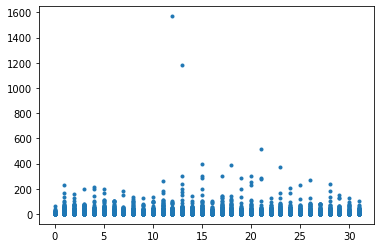

In [98]:
os_x=collection_bron1.iday
os_y=collection_bron1.nkill
plt.plot(os_x, os_y,'.')

In [101]:
#TEZA 0: w miesiacu ilość przestepstw popełnione porównywanymi rodzajami broni nie różnią się

x_z1=collection_bron1
#x_z1=collection_bron1.where(collection_bron1.iday==1)
x_avg=x_z1.mean()
x_std=x_z1.std()
x_n=len(x_z1)
y_z2=collection_bron2
y_avg=y_z2.mean()
y_std=y_z2.std()
y_n=len(y_z2)
alfa=0.05 #założone do porówanania z pval
#tools gorsze niż pozostałe czyli lewostronny obszar krytyczny
#hipoteza alternatywna (!=)
u=(x_avg-y_avg)/np.sqrt(x_std**2/x_n+y_std**2/y_n)
norm = st.norm()
pval=norm.cdf(u)
print('x_mean:',x_avg)
print ('y_mean:',y_avg)
print('statystyka testowa:',u, 'p-value:',pval, 'p-val wysokie, brak możliwości odrzucenia hipotezy zerowej, dlatego też hipoteza alternatywna nie jest rozważana')

x_mean: nkill     3.145083
iday     15.483358
dtype: float64
y_mean: nkill     2.960090
iday     15.695897
dtype: float64
statystyka testowa: nkill    0.905094
iday    -1.405415
dtype: float64 p-value: [0.81729222 0.07994902] p-val wysokie, brak możliwości odrzucenia hipotezy zerowej, dlatego też hipoteza alternatywna nie jest rozważana
